In [36]:
import os
from keras.models import load_model

In [38]:
GPU = '1'
MODEL_FILE = '__run_c_e24.h5'
INPUT_DIR = '/d2/caches/tf-speech/test/audio'
EXTRA_SILENCE_DIR = '/d2/caches/tf-speech/extra/silence'
BG_NOISE_DIR = '/d2/caches/tf-speech/train/audio/_background_noise_'
OUT_DIR = 'out'

In [37]:
%run 'lib.ipynb'
%run 'data-generator.ipynb'

In [4]:
# make only specific GPU to be utilized
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = GPU

In [5]:
test_files_file = '%s/test_files.npy' % OUT_DIR
test_X_file = '%s/test_X.mem' % OUT_DIR

In [39]:
dg = DataGenerator(
    input_dir=INPUT_DIR,
    bg_noise_dir=BG_NOISE_DIR)

In [9]:
model = load_model(MODEL_FILE)

In [10]:
if os.path.isfile(test_files_file):
    test_files = np.load(test_files_file)
else:
    test_files = dg.input_files[None]
    np.save(test_files_file, test_files)
    
print('test files: %d' % len(test_files))

test files: 158538


In [32]:
os.makedirs(OUT_DIR + '/silence', exist_ok=True)

In [35]:
if not os.path.isfile(test_X_file):

    dg.debug = False
    test_X = np.memmap(
        test_X_file + '.tmp',
        np.float32,
        'w+',
        shape=(len(test_files), dg.n_mels, dg.msg_w, 1))

    for i, file in enumerate(test_files):
        wave, _ = dg.generate_audio(label='-', file=file, transform=False)
        msg = dg.msg(wave)
        msg = dg.normalize_msg(msg)
        test_X[i] = msg[:, :, np.newaxis]

        # find some silence
        p = model.predict(msg[np.newaxis, :, :, np.newaxis])
        l = dg.labels[np.argmax(p)]
        if l == 'silence':
            shutil.copyfile(
                src=INPUT_DIR + '/' + file, dst=OUT_DIR + '/silence/' + file)

    test_X.flush()

KeyboardInterrupt: 

In [34]:
test_X = np.memmap(
    test_X_file,
    np.float32,
    'r',
    shape=(len(test_files), dg.n_mels, dg.msg_w, 1))

assert len(test_files) == len(test_X)
print('test files: %d' % len(test_X))

KeyboardInterrupt: 

file clip_8224619c3.wav
right


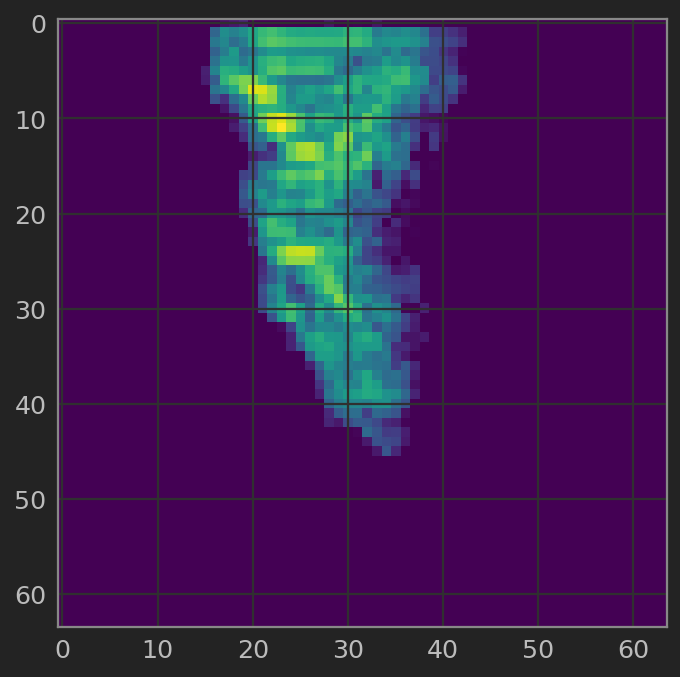

In [106]:
# dg.debug = True
# wave, _ = dg.generate_audio(label='-', file=files[1234], transform=True)
# msg = dg.msg(wave)
# msg = dg.normalize_msg(msg)
# plt.imshow(msg)
# p = m.predict(msg[np.newaxis,:,:, np.newaxis])
# print(dg.labels[np.argmax(p)])
# ipd.Audio(wave, rate=16e3)

In [119]:
i

302

299it [00:30,  9.82it/s]

silence
file clip_9a4635c68.wav


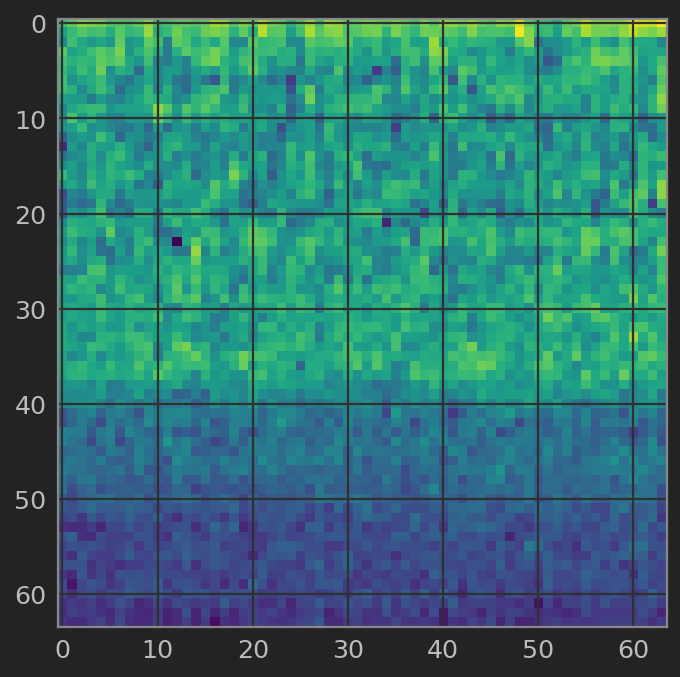

In [139]:
i = 111
dg.debug = True
msg = test_X[i]
plt.imshow(msg[:,:,0])
p = m.predict(msg[np.newaxis,:,:,:])
print(dg.labels[np.argmax(p)])
ipd.Audio(dg.generate_audio(label='-', file=test_files[i], transform=False)[0], rate=16e3)

In [133]:
ipd.Audio('/d2/caches/tf-speech/test/audio/clip_a0313971e.wav')